In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from matplotlib.sankey import Sankey

# 1. 读取数据
data = """
first_cancer	second_cancer	third_cancer	fourth_cancer
breast	breast	breast	breast
breast	ovary	kidney	colorectal
urinaryBladder	otherUrinaryOrgans	melanoma	prostate
testis	kidney	urinaryBladder	prostate
kidney	urinaryBladder	otherUrinaryOrgans	prostate
melanoma	urinaryBladder	prostate	otherUrinaryOrgans
colorectal	prostate	kidney	lung
colorectal	colorectal	colorectal	colorectal
cervix	stomach	uterus	breast
breast	breast	breast	breast
otherFemaleGenital	anus	myeloidNeoplasms	lung
kidney	prostate	melanoma	urinaryBladder
urinaryBladder	kidney	prostate	lung
melanoma	melanoma	melanoma	melanoma
cervix	breast	otherFemaleGenital	liver
colorectal	prostate	lung	otherUrinaryOrgans
otherUrinaryOrgans	prostate	urinaryBladder	thyroid
esophagus	colorectal	lung	pancreas
prostate	urinaryBladder	otherUrinaryOrgans	myeloidNeoplasms
colorectal	prostate	urinaryBladder	brain
kidney	prostate	colorectal	myeloidNeoplasms
otherRespiratory	melanoma	urinaryBladder	lung
otherUrinaryOrgans	prostate	urinaryBladder	lung
colorectal	colorectal	colorectal	colorectal
breast	esophagus	ovary	thyroid
urinaryBladder	otherRespiratory	kidney	lung
breast	breast	breast	breast
urinaryBladder	prostate	otherRespiratory	colorectal
breast	breast	breast	breast
breast	breast	breast	breast
colorectal	lymphoidNeoplasms	urinaryBladder	otherUrinaryOrgans
colorectal	otherUrinaryOrgans	urinaryBladder	prostate
breast	uterus	ovary	cervix
kidney	colorectal	prostate	esophagus
breast	breast	breast	breast
colorectal	prostate	smallIntestine	urinaryBladder
myeloidNeoplasms	prostate	esophagus	urinaryBladder
breast	myeloidNeoplasms	otherRespiratory	lung
breast	colorectal	lymphoidNeoplasms	headAndNeck
breast	breast	breast	breast
urinaryBladder	colorectal	lung	esophagus
kidney	colorectal	smallIntestine	ovary
prostate	urinaryBladder	tCellAndNKCellNeoplasms	colorectal
colorectal	kidney	ovary	uterus
urinaryBladder	uterus	otherUrinaryOrgans	lung
lymphoidNeoplasms	breast	urinaryBladder	pancreas
colorectal	headAndNeck	myeloidNeoplasms	esophagus
prostate	kidney	melanoma	colorectal
breast	esophagus	lung	kidney
colorectal	otherUrinaryOrgans	urinaryBladder	lung
otherUrinaryOrgans	urinaryBladder	prostate	myeloidNeoplasms
colorectal	liver	otherUrinaryOrgans	urinaryBladder
thyroid	breast	uterus	lung
lymphoidNeoplasms	melanoma	colorectal	anus
breast	breast	breast	breast
cervix	otherFemaleGenital	breast	colorectal
breast	breast	breast	breast
uterus	breast	melanoma	kidney
breast	breast	breast	breast
breast	headAndNeck	uterus	colorectal
lymphoidNeoplasms	otherFemaleGenital	cervix	anus
melanoma	thyroid	colorectal	otherEndocrine
prostate	lymphoidNeoplasms	otherUrinaryOrgans	urinaryBladder
breast	breast	breast	breast
lymphoidNeoplasms	colorectal	lung	esophagus
urinaryBladder	otherUrinaryOrgans	prostate	colorectal
"""

                    otherFemaleGenital  headAndNeck  lymphoidNeoplasms  \
otherFemaleGenital                   0            0                  0   
headAndNeck                          0            0                  0   
lymphoidNeoplasms                    1            0                  0   
thyroid                              0            0                  0   
liver                                0            0                  0   
urinaryBladder                       0            0                  0   
uterus                               0            0                  0   
otherUrinaryOrgans                   0            0                  0   
prostate                             0            0                  1   
breast                               0            1                  0   
myeloidNeoplasms                     0            0                  0   
cervix                               1            0                  0   
ovary                                0

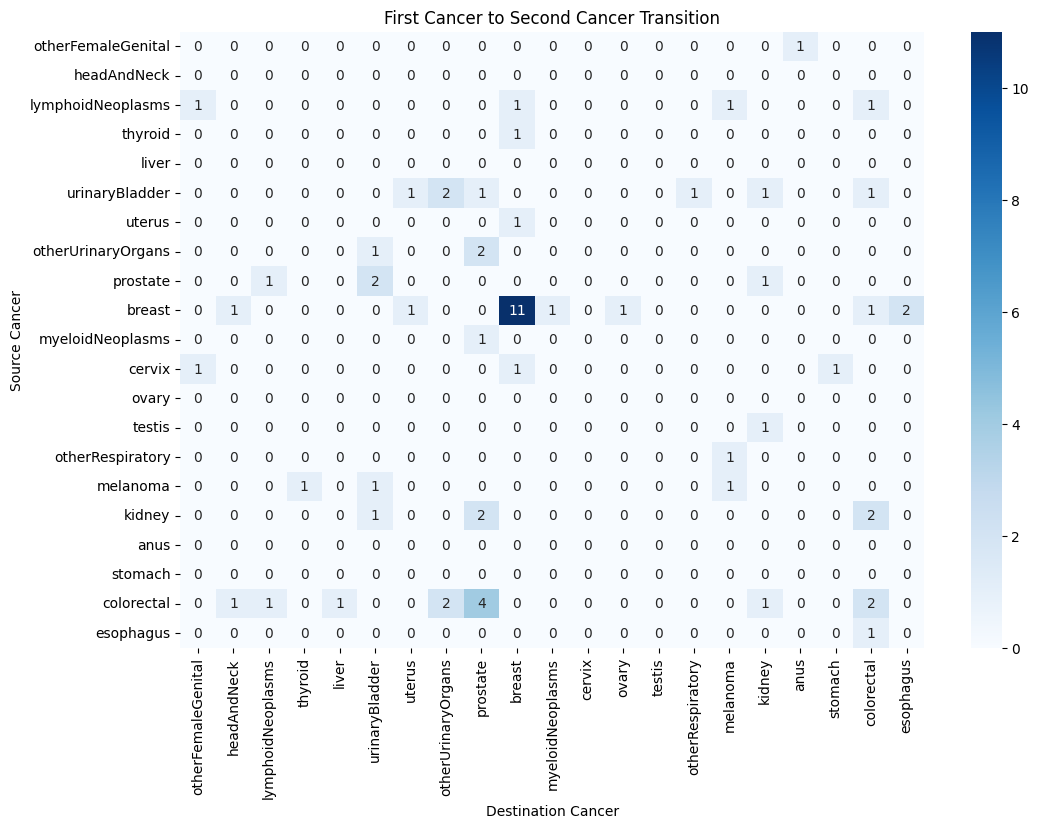

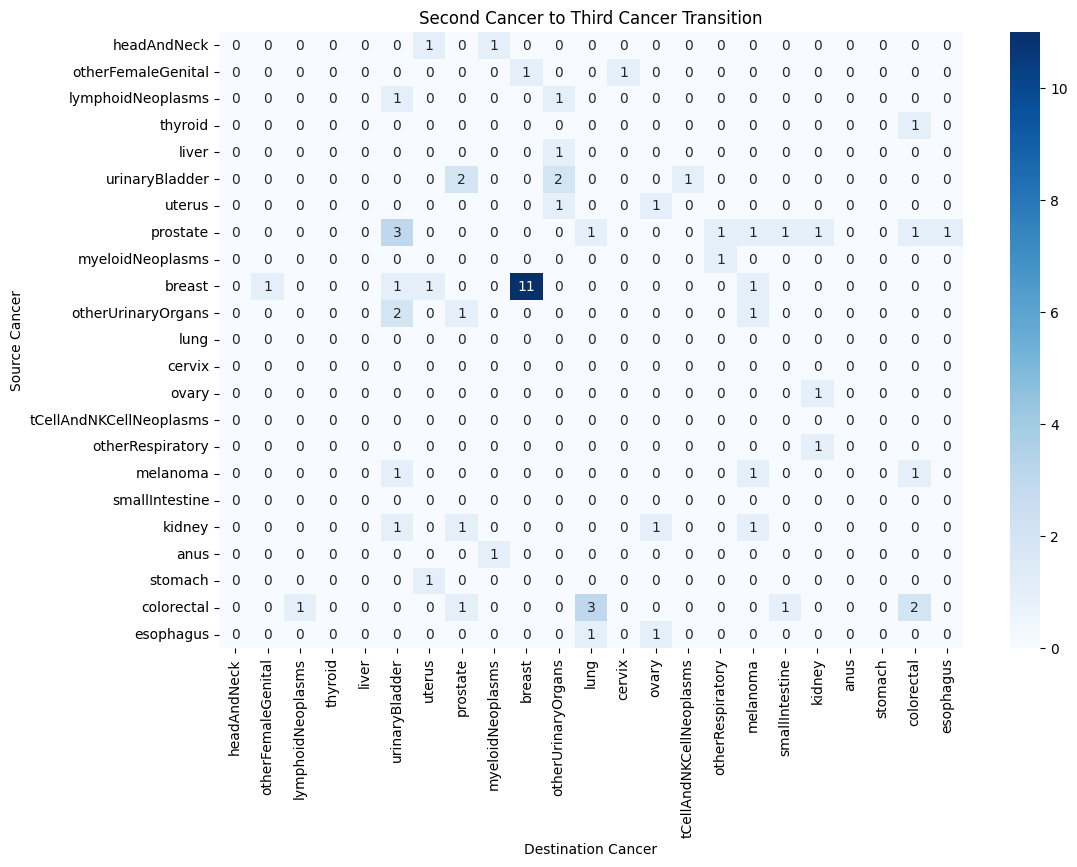

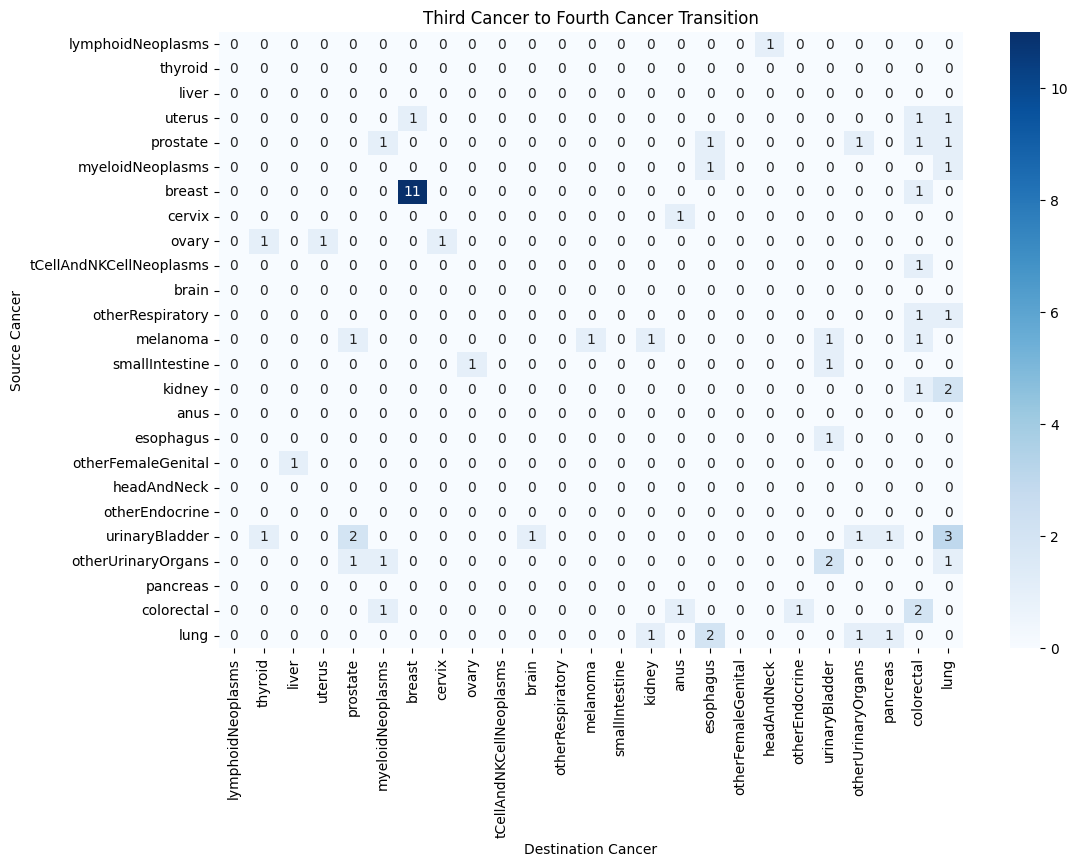

In [13]:
# 转换为 DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data), sep="\t")

# 2. 转移矩阵的构建
def build_transition_matrix(df, from_col, to_col):
    transitions = Counter()
    for _, row in df.iterrows():
        if row[from_col] != "unknown" and row[to_col] != "unknown":
            transitions[(row[from_col], row[to_col])] += 1
    unique_cancers = list(set(df[from_col]).union(set(df[to_col])))
    matrix = pd.DataFrame(0, index=unique_cancers, columns=unique_cancers)
    for (src, dest), count in transitions.items():
        matrix.loc[src, dest] = count
    return matrix

# 3. 构建每个阶段的转移矩阵
matrix_1_to_2 = build_transition_matrix(df, "first_cancer", "second_cancer")
print(matrix_1_to_2)
matrix_2_to_3 = build_transition_matrix(df, "second_cancer", "third_cancer")
matrix_3_to_4 = build_transition_matrix(df, "third_cancer", "fourth_cancer")


def visualize_matrix(matrix, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel("Source Cancer")
    plt.xlabel("Destination Cancer")
    plt.show()
# 分别可视化转移矩阵
visualize_matrix(matrix_1_to_2, "First Cancer to Second Cancer Transition")
visualize_matrix(matrix_2_to_3, "Second Cancer to Third Cancer Transition")
visualize_matrix(matrix_3_to_4, "Third Cancer to Fourth Cancer Transition")

In [16]:

# 4. 高频组合分析
def extract_combinations(df, combo_size):
    combos = []
    for _, row in df.iterrows():
        cancers = [c for c in row if c != "unknown"]
        combos.extend(combinations(cancers, combo_size))
    combo_counts = Counter(combos)
    return pd.DataFrame(combo_counts.items(), columns=["Combination", "Frequency"]).sort_values(by="Frequency", ascending=False)

# 4.1 两种癌症组合分析
two_combos = extract_combinations(df, 2)
# 4.2 三种癌症组合分析
three_combos = extract_combinations(df, 3)
# 4.3 四种癌症组合分析
four_combos = extract_combinations(df, 4)

# 输出结果表格
import ace_tools as tools
tools.display_dataframe_to_user("Two Cancer Combinations", two_combos)
tools.display_dataframe_to_user("Three Cancer Combinations", three_combos)
tools.display_dataframe_to_user("Four Cancer Combinations", four_combos)


# # 5. 优化 Sankey 图
# from matplotlib.sankey import Sankey

# def plot_sankey(df, max_flows=20):
#     flows = Counter()
#     for _, row in df.iterrows():
#         cancers = [c for c in row if c != "unknown"]
#         for i in range(len(cancers) - 1):
#             flows[(cancers[i], cancers[i+1])] += 1

#     top_flows = flows.most_common(max_flows)
#     sources, targets, weights = zip(*[(src, dest, count) for (src, dest), count in top_flows])
#     unique_nodes = list(set(sources + targets))
#     node_dict = {node: i for i, node in enumerate(unique_nodes)}

#     sankey = Sankey(unit=None)
#     for src, dest, weight in top_flows:
#         sankey.add(flows=[weight, -weight],
#                    labels=[src, dest],
#                    orientations=[0, 0])
#     sankey.finish()
#     plt.title("Cancer Transition Sankey Diagram")
#     plt.show()

# plot_sankey(df)

ModuleNotFoundError: No module named 'ace_tools'

In [15]:
pip install ace_tools


[notice] A new release of pip is available: 23.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 任务清单：
# UKBiobank课程考试、内容分享 
# Epistasis文献收集 
# Epistasis例子ref和alt调整，同时查看这些SNP位于的基因。 
# Epistasis数据库更新 
# MPC：统计每种癌症平均几年以后发病，绘制四分位图【有诊断时间顺序的样本：8540个，白人样本8374个】 
# 统计哪些类型的癌症中MPC占比大，分析几年后风险最大 
# 分析bone,小肠发病风险高，都发病到哪里去了，统计规律 
# PRS发病率越大，发病时间间隔怎么样？ 
# MPC GWAS新位点解释，统计case和control中每种基因型的样本数 
# 流行病学做FDR矫正，筛选P<0.05的条目 
# 对于MPC≥3的GWAS位点分析gene-based结果 
# 分析MPC≥3都是得了什么样的疾病 
# MPC预后分析，找几个例子图 